In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.notebook import tqdm
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.io import loadmat 
from scipy import signal

In [2]:
from scipy.stats import pearsonr

In [3]:
plt.rcParams["font.family"] = "Arial" 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams["svg.fonttype"] = "none"
#plt.rcParams['text.latex.preamble'] = r'\usepackage{mlmodern}' #{lmodern}'

In [4]:
def bootstrap_ci(x, axis=0):
    return sns.utils.ci(sns.algorithms.bootstrap(x, axis=axis), axis=axis)

In [5]:
"""
def vprop_similarity(x, y):
    len_pm = [np.sum(x >= 0), np.sum(x < 0)]
    xp, xm = np.maximum(x, 0), np.minimum(x, 0)
    vp_sim_p = signal.correlate(xp, y)
    vp_sim_m = signal.correlate(xm, y)
    vp_sim = vp_sim_p/len_pm[0] + vp_sim_m/len_pm[1]
    dotp = np.dot(xp, y)/len_pm[0] + np.dot(xm, y)/len_pm[1]
    return vp_sim, dotp
"""

'\ndef vprop_similarity(x, y):\n    len_pm = [np.sum(x >= 0), np.sum(x < 0)]\n    xp, xm = np.maximum(x, 0), np.minimum(x, 0)\n    vp_sim_p = signal.correlate(xp, y)\n    vp_sim_m = signal.correlate(xm, y)\n    vp_sim = vp_sim_p/len_pm[0] + vp_sim_m/len_pm[1]\n    dotp = np.dot(xp, y)/len_pm[0] + np.dot(xm, y)/len_pm[1]\n    return vp_sim, dotp\n'

In [6]:
def cos_sim(a,b):
    return np.dot(a, b)#/(np.linalg.norm(a)*np.linalg.norm(b))

In [7]:
"""
def vprop_similarity(x, y):
    isp = np.argwhere(np.diff(np.sign(x))).flatten() # intersection_points
    isp_ = np.r_[0, isp, len(x)]
    n = len(isp)
    time = np.arange(len(x))
    dt = [isp_[i+1]-isp_[i] for i in range(n+1)]
    rpf = [1*(time > isp_[i]) - 1*(time > isp_[i+1]) for i in range(n+1)]
    xrpf = [x * rpf[i] for i in range(n+1)]
    vp_sim_split = [cos_sim(x[isp_[i]:isp_[i+1]], y[isp_[i]:isp_[i+1]])/dt[i] for i in range(n+1)]
    xxx = [np.dot(x[isp_[i]:isp_[i+1]], x[isp_[i]:isp_[i+1]])/dt[i] for i in range(n+1)]
    vp_sim_split = [np.minimum(vp_sim_split[i], xxx[i]) for i in range(n+1)]
    #vp_sim = np.sum(vp_sim_split)
    vp_sim = np.sum(vp_sim_split)
    return vp_sim
"""

'\ndef vprop_similarity(x, y):\n    isp = np.argwhere(np.diff(np.sign(x))).flatten() # intersection_points\n    isp_ = np.r_[0, isp, len(x)]\n    n = len(isp)\n    time = np.arange(len(x))\n    dt = [isp_[i+1]-isp_[i] for i in range(n+1)]\n    rpf = [1*(time > isp_[i]) - 1*(time > isp_[i+1]) for i in range(n+1)]\n    xrpf = [x * rpf[i] for i in range(n+1)]\n    vp_sim_split = [cos_sim(x[isp_[i]:isp_[i+1]], y[isp_[i]:isp_[i+1]])/dt[i] for i in range(n+1)]\n    xxx = [np.dot(x[isp_[i]:isp_[i+1]], x[isp_[i]:isp_[i+1]])/dt[i] for i in range(n+1)]\n    vp_sim_split = [np.minimum(vp_sim_split[i], xxx[i]) for i in range(n+1)]\n    #vp_sim = np.sum(vp_sim_split)\n    vp_sim = np.sum(vp_sim_split)\n    return vp_sim\n'

In [8]:
gazew_subj = np.load("../results/gazew_mean-ci_goodsubj_N2010.npz", allow_pickle=True)

In [9]:
gr_keys = list(gazew_subj["0"].item().keys())
subj_labels = ['TD adults', 'TD children', 'ASD adults', 'ASD children'] #subj2subj_dist['group_name'][gr_idx]

In [10]:
clip_idx = 3

In [11]:
gazew_diff_subj = {}
for key in gr_keys:
    gazew_mean = gazew_subj[str(clip_idx)].item()[key]["mean"]
    gazew_diff_subj[key] = gazew_mean[0] - gazew_mean[1]

In [12]:
adjusted_corr_subj = {}
for key in gr_keys:
    adjusted_corr_subj[key] = {}
    corr, _ = pearsonr(gazew_diff_subj[gr_keys[0]], gazew_diff_subj[key])
    #vp_sim = vprop_similarity(gazew_diff_subj[gr_keys[0]], gazew_diff_subj[key])
    adjusted_corr_subj[key] = corr
"""
max_dotp = np.max(adjusted_corr_subj[gr_keys[0]]["vp_sim"])
for key in gr_keys:
    adjusted_corr_subj[key]["vp_sim_adj"] = adjusted_corr_subj[key]["vp_sim"] / max_dotp 
"""

'\nmax_dotp = np.max(adjusted_corr_subj[gr_keys[0]]["vp_sim"])\nfor key in gr_keys:\n    adjusted_corr_subj[key]["vp_sim_adj"] = adjusted_corr_subj[key]["vp_sim"] / max_dotp \n'

In [13]:
adjusted_corr_subj 

{'adult control': 0.9999999999999998,
 'child control': 0.8319360576136422,
 'adult autistic': 0.7948342749589052,
 'child autistic': 0.7760145240789502}

In [14]:
isp = np.argwhere(np.diff(np.sign(gazew_diff_subj[gr_keys[0]]))).flatten() # intersection_points

## get best head indices

In [15]:
training_methods = ["dino", "supervised"] 
depth_list = [8, 12]
num_models = 6

In [16]:
"""

head_label = head_GMM_label["head_label"].astype(int)
change_dist = head_GMM_label["change_dist"].astype(int)
num_groups = len(np.unique(label_rank))
"""

'\n\nhead_label = head_GMM_label["head_label"].astype(int)\nchange_dist = head_GMM_label["change_dist"].astype(int)\nnum_groups = len(np.unique(label_rank))\n'

In [17]:
labels = np.load("../results/attn_best_label_N2010.npy")
head_label = 1*(labels == 1).reshape(4,6,6)
head_GMM_label = np.load("../results/head_GMM_label.npz", allow_pickle=True)
layer_indices = head_GMM_label["layer_indices"].astype(int)

## load gaze weight

In [18]:
preproceeed_data_path = "../dataset/Nakano_etal_2010/preprocessed_data"
df = pd.read_csv(f"{preproceeed_data_path}/eyeclip_annotation.csv")

#clip_indices = [3]#[0, 3]
num_sampling = 3883
clip_dur = 77 # sec
keys = ['adult control', 'dino', 'supervised']
num_obj = 18

gaze_weight_vit = np.load(f"{preproceeed_data_path}/gaze_weight_vit.npz", allow_pickle=True)

In [19]:
gazews_dict = {}
#for clip_idx in tqdm(clip_indices):
df_clip = df[df["clip_index"] == (clip_idx+1)].reset_index()
sidx = df_clip["start_resampled_index"].unique()[0]
eidx = df_clip["end_resampled_index"].unique()[0]
subj_idx = df_clip["subj"].unique()
num_faces = len(subj_idx)
len_clip = eidx - sidx
subj_slice = [df_clip[(df_clip["subj"] == s) & (df_clip["face"] == 1)].index.values for s in subj_idx]
gs = gazew_subj[str(clip_idx)].item()["adult control"]["mean"]

In [20]:
gaze_weight_subj = np.load(f"{preproceeed_data_path}/gaze_weight_goodsubj.npz", allow_pickle=True)

gaze_weight_goodsubj = gaze_weight_subj['gaze_weight_goodsubj']
gr_goodsubj = gaze_weight_subj['gr_goodsubj']
group_name = gaze_weight_subj['group_name']

gazew_subj_gr = {}
gr_indices = [0,1,4,3]
for gr_idx in gr_indices:
    gazew_subj_gr[group_name[gr_idx]] = gaze_weight_goodsubj[gr_goodsubj == gr_idx]

In [21]:
gazew_diff_ci_subj = {}
for key in gr_keys:
    gazew_subj_gr_tmp = gazew_subj_gr[key]
    gazew_subj_faces = [np.nansum(gazew_subj_gr_tmp[:, sidx:eidx, ss], axis=-1) for ss in subj_slice]
    gazew_diff_ci_subj[key] = bootstrap_ci(gazew_subj_faces[0] - gazew_subj_faces[1])

In [22]:
num_heads = 6

In [23]:
gazews_dict[str(clip_idx)] = {} 
gazews_dict[str(clip_idx)]["time"] = np.arange(len_clip) * clip_dur / num_sampling

tm = training_methods[0]
gazews = []
for i, depth in enumerate(depth_list):
    gw = gaze_weight_vit[tm].item()[str(depth)]
    gw_slice = gw[:, :, :, sidx:eidx]
    d_indices = layer_indices[layer_indices[:, 0] == depth][:,1]
    for m_idx in range(num_models):
        for j, d_idx in enumerate(d_indices):
            ij = i * 2 + j
            for h_idx in range(num_heads):
                hl = head_label[ij, m_idx, h_idx]
                if hl == 1:
                    #if label_rank[hl] == 0:
                    gazews.append(gw_slice[m_idx, d_idx, h_idx])
gazews = np.stack(gazews)
gazews_parts_sum = np.array([np.sum(gazews[:, :, subj_slice[f_idx]], axis=-1) for f_idx in range(num_faces)])
gazews_dict[str(clip_idx)]["DINO ViT (G1)"] = gazews_parts_sum

In [24]:
gw = gazews_dict[str(clip_idx)]["DINO ViT (G1)"]
gazew_vit_mean =  np.mean(gw, axis=1)
gazew_vit_ci = np.array([bootstrap_ci(gw[f_idx]) for f_idx in range(num_faces)])
gazew_vit_diff = gazew_vit_mean[0] - gazew_vit_mean[1]
gazew_vit_diff_ci = bootstrap_ci(gw[0] - gw[1])

In [25]:
#vp_sim = vprop_similarity(gazew_diff_subj[gr_keys[0]], gazew_vit_diff)
#adjusted_corr_vit = vp_sim / max_dotp
corr_vit, p = pearsonr(gazew_diff_subj[gr_keys[0]], gazew_vit_diff)

In [26]:
corr_vit, p

(0.4253306712214503, 3.870862908013151e-15)

In [27]:
x = gazew_diff_subj[gr_keys[0]]
isp = np.argwhere(np.diff(np.sign(x))).flatten() # intersection_points
isp_ = np.r_[0, isp, len(x)]
n = len(isp)
time = np.arange(len(x))
dt = [isp_[i+1]-isp_[i] for i in range(n+1)]
#rpf = [1*(time > isp_[i]) - 1*(time > isp_[i+1]) for i in range(n+1)]
#xrpf = [x * rpf[i] for i in range(n+1)]
vp_sim_split = [np.sqrt(np.mean((x[isp_[i]:isp_[i+1]])**2)) for i in range(n+1)]
np.sum(vp_sim_split)

2.0799526504511867

In [28]:
cmap = sns.color_palette("colorblind")
#cmap = sns.color_palette("bright")

In [29]:
time = gazews_dict[str(clip_idx)]["time"]
colors = ["tab:blue", "tab:red"]
#colors = ["tab:blue", "tab:red"]

In [30]:
pos_label = ["Lt. face", "Rt. face"]

In [31]:
def get_peak(x):
    isp = np.argwhere(np.diff(np.sign(x))).flatten() # intersection_points
    isp_ = np.r_[0, isp, len(x)]
    n = len(isp)
    time = np.arange(len(x))
    rpf = [1*(time > isp_[i]) - 1*(time > isp_[i+1]) for i in range(n+1)]
    xrpf = [x * rpf[i] for i in range(n+1)]
    xrpf_minmax = [np.maximum(np.argmin(xrpf[i]), np.argmax(xrpf[i])) for i in range(n+1)]
    return xrpf_minmax

In [32]:
xrpf_minmax = get_peak(gazew_diff_subj[gr_keys[0]])

In [33]:
xrpf_minmax2 = [8, 40, 91, 98, 231, 310]

In [34]:
glabels = ["TD\nadults", "DINO\nViT (G1)"]

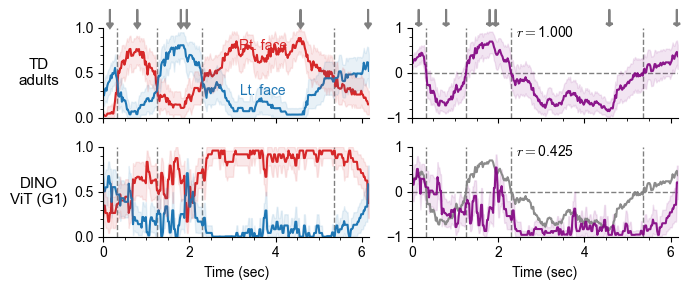

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(7, 3), sharex='all', sharey="col", tight_layout=True)#, gridspec_kw={'width_ratios': [2, 2, 1.75]})
i = 0
key = gr_keys[i]
#for i, key in enumerate(gr_keys):
gazew_mean = [gazew_subj[str(clip_idx)].item()[key]["mean"], gazew_vit_mean]
gazew_ci = [gazew_subj[str(clip_idx)].item()[key]["ci"], gazew_vit_ci]
gazew_diff = [gazew_diff_subj[key], gazew_vit_diff]
gazew_diff_ci = [gazew_diff_ci_subj[key], gazew_vit_diff_ci]
corrs = [1, corr_vit]
for i in range(2):
    axes[i, 0].text(-1.5, 0.5, glabels[i], ha="center", va="center", fontsize=11)
    for f_idx in range(num_faces):
        axes[i, 0].plot(time, gazew_mean[i][f_idx], 
                        label=pos_label[f_idx], color=colors[f_idx], zorder=(1-f_idx))
        axes[i, 0].fill_between(time, gazew_ci[i][f_idx, 0], gazew_ci[i][f_idx, 1], 
                                alpha=0.1, color=colors[f_idx])

        if f_idx == 0:
            axes[i, 1].plot(time, gazew_diff[i], alpha=0.9, color="purple", zorder=2, label=r"Lt. $-$ Rt. face")
            axes[i, 1].fill_between(time, gazew_diff_ci[i][0], gazew_diff_ci[i][1], alpha=0.1, color="purple")
            axes[i, 0].set_ylim(0, 1)
            axes[i, 1].axhline(0, alpha=1, linestyle="dashed", color="gray", zorder=-2, lw=1)
            axes[i, 1].set_ylim(-1, 1)
            axes[i, 1].text(0.5, 0.95, f"$r=${corrs[i]:.3f}", 
                            fontsize=10, transform=axes[i, 1].transAxes, va="center", ha="center", math_fontfamily='cm')
            if i > 0:
                axes[i, 1].plot(time, gazew_diff[0], 
                                alpha=0.9, color="gray", label="TD adult", zorder=1)
axes[0, 0].text(0.6, 0.8, "Rt. face", color="tab:red",
                fontsize=10, transform=axes[0, 0].transAxes, va="center", ha="center")
axes[0, 0].text(0.6, 0.3, "Lt. face", color="tab:blue",
                fontsize=10, transform=axes[0, 0].transAxes, va="center", ha="center")
for k in range(2):
    axes[-1, k].set_xlabel('Time (sec)')
    for i in range(2):
        axes[i, k].set_xlim(0, time[-1])       
        axes[i, k].minorticks_on()
        for t in time[isp]:
            axes[i, k].axvline(x=t, color="gray", alpha=1, linestyle="dashed", zorder=-2, lw=1)#, zorder=-1)

    for ti, t in enumerate(time[xrpf_minmax2]):
        axes[0, k].arrow(t, 1+0.2*(k+1), 0, -0.15*(k+1), lw=1.5,
                         head_width=0.15, head_length=0.05, color="gray", zorder=999, clip_on=False)

#axes[0, k].set_title("Face-viewing proportion", fontsize=11)
#axes[0, k].set_title(r'$\Delta$Face-viewing proportion'+'\n' + r'(Lt. $-$ Rt. face)', fontsize=11)
plt.savefig(f"../figures/viewing_prop_vit_N2010_clip{clip_idx+1}.svg", dpi=300)